# Table of contents

## 1.0 Setup

## 2.0 Data preparation
    2.1 Deleting columns and rows
        2.1.1 Privacy issues
        2.1.2 Unnecessary columns
        
    2.2 Deleting rows for low-activity customers
    
    2.3 Adding columns
        2.3.1 Creating the "region" column
        2.3.2 Creating the "department" column
        2.3.3 Creating the "order_day_of_week" column
        2.3.4 Creating the "age_group" column
        2.3.5 Creating the "income_group" column
        2.3.6 Creating the "dependant_flag" column
        2.3.7 Creating the "gluten_flag" column

## 3.0 Analysis
    3.1 Time analysis
        3.1.1 Busiest day of the week by the number of orders
        3.1.2 Busiest time of the day by the number of orders
        3.1.3 Hours of the day by the sum and the mean of the unit prices
        
    3.2 Products analysis
        3.2.1 Products per price range
        3.2.2 Product popularity by department

    3.3 Customer analysis
        3.3.1 Customers and brand loyalty
        3.3.2 Customers and ordering habits
        3.3.3 Geographical analysis
        3.3.4 Demographical analysis - age
        3.3.5 Demographical analysis - familial status
        3.3.6 Demographical analysis - income
        
    3.4 Customer profiling
        3.4.1 Income and age
        3.4.2 Profile: Gluten tolerance
        
## 4.0 Exporting data
    4.1 Exporting visualizations
    4.2 Exporting final data set

# 1.0 Setup

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Defining the path

path = (r'E:\OneDrive\ANITA\DATA ANALYST\IMMERSION\Achievement 4\22-08 Instacart Basket Analysis\2.0 Data')

In [3]:
# Importing orders_products_customers.pkl as df_opc

df_opc = pd.read_pickle(os.path.join(path, '2.2 Prepared data', 'orders_products_customers.pkl'))

In [4]:
# Setting up display options

pd.set_option('display.max_columns', None)

# 2.0 Data preparation

In [5]:
df_opc.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price_product,spender_flag,median_days_between_orders,frequency_flag,first_name,last_name,gender,state,age,date_joined,no_of_dependants,marital_status,income
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,both,Middle-end product,Regularly busy,Regularly busy days,Very high,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,False,196,1,1,Soda,77,7,9.0,both,Middle-end product,Regularly busy,Least busy days,Average,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,False,196,1,1,Soda,77,7,9.0,both,Middle-end product,Regularly busy,Least busy days,Extreme,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,False,196,1,1,Soda,77,7,9.0,both,Middle-end product,Least busy,Least busy days,Average,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,False,196,1,1,Soda,77,7,9.0,both,Middle-end product,Least busy,Least busy days,Extreme,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [6]:
df_opc.shape

(32404859, 34)

In [7]:
df_opc.dtypes

order_id                        object
user_id                         object
order_number                    object
orders_day_of_week               int64
order_hour_of_day                int64
days_since_prior_order         float64
new_customer                      bool
product_id                       int64
add_to_cart_order                int64
reordered                        int64
product_name                    object
aisle_id                         int64
department_id                    int64
prices                         float64
_merge                        category
price_range                     object
busiest_day                     object
busiest_days                    object
busiest_period_of_day           object
max_order                        int64
loyalty_flag                    object
average_price_product          float64
spender_flag                    object
median_days_between_orders     float64
frequency_flag                  object
first_name               

In [8]:
df_opc.describe()

,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,average_price_product,median_days_between_orders,age,no_of_dependants,income
count,3.240486e+07,3.240486e+07,3.032876e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.240486e+07,3.239973e+07,3.240486e+07,3.240486e+07,3.240485e+07,3.240486e+07,3.240486e+07,3.240486e+07
mean,2.738867e+00,1.342515e+01,1.110408e+01,2.559866e+04,8.352547e+00,5.895873e-01,7.119612e+01,9.919792e+00,7.790994e+00,3.305217e+01,1.198023e+01,1.039776e+01,4.946527e+01,1.501896e+00,9.943773e+04
std,2.090077e+00,4.246380e+00,8.779064e+00,1.408400e+04,7.127071e+00,4.919087e-01,3.821139e+01,6.281485e+00,4.241809e+00,2.515525e+01,8.324227e+01,7.131754e+00,1.848558e+01,1.118865e+00,4.305727e+04
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,2.590300e+04
25%,1.000000e+00,1.000000e+01,5.000000e+00,1.354400e+04,3.000000e+00,0.000000e+00,3.100000e+01,4.000000e+00,4.200000e+00,1.300000e+01,7.387298e+00,6.000000e+00,3.300000e+01,1.000000e+00,6.700400e+04
50%,3.000000e+00,1.300000e+01,8.000000e+00,2.530200e+04,6.000000e+00,1.000000e+00,8.300000e+01,9.000000e+00,7.400000e+00,2.600000e+01,7.824786e+00,8.000000e+00,4.900000e+01,2.000000e+00,9.661800e+04
75%,5.000000e+00,1.600000e+01,1.500000e+01,3.794700e+04,1.100000e+01,1.000000e+00,1.070000e+02,1.600000e+01,1.130000e+01,4.700000e+01,8.254023e+00,1.300000e+01,6.500000e+01,3.000000e+00,1.279120e+05
max,6.000000e+00,2.300000e+01,3.000000e+01,4.968800e+04,1.450000e+02,1.000000e+00,1.340000e+02,2.100000e+01,2.500000e+01,9.900000e+01,2.500542e+04,3.000000e+01,8.100000e+01,3.000000e+00,5.939010e+05


In [9]:
# Unique values accros columns

df_opc.nunique()

order_id                      3214685
user_id                        206209
order_number                       99
orders_day_of_week                  7
order_hour_of_day                  24
days_since_prior_order             31
new_customer                        2
product_id                      49659
add_to_cart_order                 145
reordered                           2
product_name                    49661
aisle_id                          134
department_id                      21
prices                            240
_merge                              1
price_range                         3
busiest_day                         3
busiest_days                        3
busiest_period_of_day               4
max_order                          99
loyalty_flag                        3
average_price_product          128637
spender_flag                        2
median_days_between_orders         61
frequency_flag                      3
first_name                        208
last_name   

## 2.1 Deleting columns and rows

### 2.1.1 Privacy issues

In [10]:
# Dropping columns first_name and last_name

df_opc = df_opc.drop(columns = ['first_name', 'last_name'])

### 2.1.2 Unnecessary columns

In [11]:
# Dropping columns _merge and aisle_id

df_opc = df_opc.drop(columns = ['_merge', 'aisle_id'])

## 2.2 Deleting rows for low-activity customers

In [12]:
# Creating activity_level flag based on max_order column

df_opc.loc[df_opc['max_order'] >= 5, 'activity_level_flag'] = 'High-activity customer'
df_opc.loc[df_opc['max_order'] < 5, 'activity_level_flag'] = 'Low-activity customer'

In [13]:
df_opc['activity_level_flag'].value_counts(dropna = False)

High-activity customer    30964564
Low-activity customer      1440295
Name: activity_level_flag, dtype: int64

In [14]:
df_opc_notactive = df_opc[df_opc['activity_level_flag'] == 'Low-activity customer']

In [15]:
df_opc_notactive.shape

(1440295, 31)

In [16]:
# Exporting df_opc_notactive as not_active.csv

df_opc_notactive.to_csv(os.path.join(path, '2.2 Prepared data', 'not_active.csv'))

In [17]:
# Dropping low-activity customers

df_opc = df_opc[df_opc['activity_level_flag'] == 'High-activity customer']

In [18]:
df_opc.shape

(30964564, 31)

In [19]:
df_opc.nunique()

order_id                      3064375
user_id                        162631
order_number                       99
orders_day_of_week                  7
order_hour_of_day                  24
days_since_prior_order             31
new_customer                        2
product_id                      49628
add_to_cart_order                 145
reordered                           2
product_name                    49630
department_id                      21
prices                            240
price_range                         3
busiest_day                         3
busiest_days                        3
busiest_period_of_day               4
max_order                          95
loyalty_flag                        3
average_price_product          120226
spender_flag                        2
median_days_between_orders         61
frequency_flag                      3
gender                              2
state                              51
age                                64
date_joined 

## 2.3 Adding columns

### 2.3.1 Creating the "region" column

#### Creating the region list

In [20]:
# Northeast

NE = ['Maine',
      'New Hampshire',
      'Vermont',
      'Massachusetts',
      'Rhode Island',
      'Connecticut',
      'New York',
      'Pennsylvania',
      'New Jersey']

In [21]:
# Midwest

MW = ['Wisconsin',
      'Michigan',
      'Illinois',
      'Indiana',
      'Ohio',
      'North Dakota',
      'South Dakota',
      'Nebraska',
      'Kansas',
      'Minnesota',
      'Iowa',
      'Missouri']

In [22]:
# South

S = ['Delaware',
     'Maryland',
     'District of Columbia',
     'Virginia',
     'West Virginia',
     'North Carolina',
     'South Carolina',
     'Georgia',
     'Florida',
     'Kentucky',
     'Tennessee',
     'Mississippi',
     'Alabama',
     'Oklahoma',
     'Texas',
     'Arkansas',
     'Louisiana']

In [23]:
# West

W = ['Idaho',
     'Montana',
     'Wyoming',
     'Nevada',
     'Utah',
     'Colorado',
     'Arizona',
     'New Mexico',
     'Alaska',
     'Washington',
     'Oregon',
     'California',
     'Hawaii']

In [24]:
region = []

for state in df_opc['state']:
    if state in NE:
        region.append('Northeast')
    elif state in MW:
        region.append('Midwest')
    elif state in S:
        region.append('South')
    else:
        region.append('West')

In [25]:
len(region)

30964564

In [26]:
# Adding the region list to the df_opc

df_opc['region'] = region

### 2.3.2 Creating the "department" column

In [27]:
# Importing departments_wrangled.csv as df_departments

df_departments = pd.read_csv(os.path.join(path, '2.2 Prepared data', 'departments_wrangled.csv'), index_col = False)

In [28]:
df_departments.head()

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [29]:
# Changing the Unnamed: 0 column name

df_departments = df_departments.rename(columns = {'Unnamed: 0' : 'department_id'})

In [30]:
df_departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [31]:
# Merging df_opc and df_departments

df_opc = df_opc.merge(df_departments, on = 'department_id')

### 2.3.3 Creating the "order_day_of_week" column

In [32]:
# Creating the df_day_week

data = [
        [0, 'Saturday'],
        [1, 'Sunday'],
        [2, 'Monday'],
        [3, 'Tuesday'],
        [4, 'Wednesday'],
        [5, 'Thursday'],
        [6, 'Friday']
        ]
df_day_week = pd.DataFrame(data, columns = ['orders_day_of_week', 'order_day_of_week'])

In [33]:
# Merging df_opc and df_day_week

df_opc = df_opc.merge(df_day_week, on = 'orders_day_of_week')

### 2.3.4 Creating the "age_group" column

In [34]:
# Creating the age_group column based on the age of the customer

df_opc.loc[df_opc['age'] < 25, 'age_group'] = 'Young adult'

df_opc.loc[(df_opc['age'] >= 25) & (df_opc['age'] < 45), 'age_group'] = 'Adult'

df_opc.loc[(df_opc['age'] >= 45) & (df_opc['age'] < 60), 'age_group'] = 'Middle age'

df_opc.loc[df_opc['age'] >=60, 'age_group'] = 'Senior'

### 2.3.5 Creating the "income_group" column

In [35]:
# Creating the income_group column based on the income of the customer

df_opc.loc[df_opc['income'] <= 52200, 'income_group'] = 'Low income'

df_opc.loc[(df_opc['income'] > 52200) & (df_opc['income'] <= 156600), 'income_group'] = 'Middle income'

df_opc.loc[df_opc['income'] > 156600, 'income_group'] = 'High income'

### 2.3.6 Creating the "dependant_flag" column

In [36]:
# Creating the dependant_flag column based on the number of dependants

df_opc.loc[df_opc['no_of_dependants'] == 0, 'dependant_flag'] = 'No dependants'

df_opc.loc[df_opc['no_of_dependants'] > 0, 'dependant_flag'] = 'Has dependants'

### 2.3.7 Creating the "gluten_flag" column

In [37]:
# Creating the "gluten_flag" column based on the department

df_opc['gluten_flag'] = ['Gluten tolerant' if x == 'bakery' else 'Gluten intolerant' for x in df_opc['department']]

In [38]:
df_opc['gluten_flag'] = df_opc.groupby('user_id')['gluten_flag'].transform(np.max)

In [39]:
df_opc['gluten_flag'].value_counts(dropna = False)

Gluten tolerant      26992302
Gluten intolerant     3972262
Name: gluten_flag, dtype: int64

In [40]:
df_opc.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,product_name,department_id,prices,price_range,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price_product,spender_flag,median_days_between_orders,frequency_flag,gender,state,age,date_joined,no_of_dependants,marital_status,income,activity_level_flag,region,department,order_day_of_week,age_group,income_group,dependant_flag,gluten_flag
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,7,9.0,Middle-end product,Regularly busy,Regularly busy days,Very high,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,High-activity customer,South,beverages,Monday,Adult,Low income,Has dependants,Gluten intolerant
1,3367565,1,6,2,7,19.0,False,196,1,1,Soda,7,9.0,Middle-end product,Regularly busy,Regularly busy days,Average,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,High-activity customer,South,beverages,Monday,Adult,Low income,Has dependants,Gluten intolerant
2,1870022,15,17,2,16,8.0,False,196,6,1,Soda,7,9.0,Middle-end product,Regularly busy,Regularly busy days,Extreme,22,Regular customer,3.980556,Low spender,10.0,Frequent customer,Female,Indiana,69,6/3/2019,0,divorced/widowed,54313,High-activity customer,Midwest,beverages,Monday,Senior,Middle income,No dependants,Gluten intolerant
3,1911383,15,18,2,11,7.0,False,196,1,1,Soda,7,9.0,Middle-end product,Regularly busy,Regularly busy days,Extreme,22,Regular customer,3.980556,Low spender,10.0,Frequent customer,Female,Indiana,69,6/3/2019,0,divorced/widowed,54313,High-activity customer,Midwest,beverages,Monday,Senior,Middle income,No dependants,Gluten intolerant
4,887727,15,9,2,13,7.0,False,14715,1,1,Coconut Water,7,4.0,Low-end product,Regularly busy,Regularly busy days,Extreme,22,Regular customer,3.980556,Low spender,10.0,Frequent customer,Female,Indiana,69,6/3/2019,0,divorced/widowed,54313,High-activity customer,Midwest,beverages,Monday,Senior,Middle income,No dependants,Gluten intolerant


In [41]:
df_opc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30964564 entries, 0 to 30964563
Data columns (total 38 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   order_id                    object 
 1   user_id                     object 
 2   order_number                object 
 3   orders_day_of_week          int64  
 4   order_hour_of_day           int64  
 5   days_since_prior_order      float64
 6   new_customer                bool   
 7   product_id                  int64  
 8   add_to_cart_order           int64  
 9   reordered                   int64  
 10  product_name                object 
 11  department_id               int64  
 12  prices                      float64
 13  price_range                 object 
 14  busiest_day                 object 
 15  busiest_days                object 
 16  busiest_period_of_day       object 
 17  max_order                   int64  
 18  loyalty_flag                object 
 19  average_price_produ

In [42]:
df_opc.nunique()

order_id                      3064375
user_id                        162631
order_number                       99
orders_day_of_week                  7
order_hour_of_day                  24
days_since_prior_order             31
new_customer                        2
product_id                      49628
add_to_cart_order                 145
reordered                           2
product_name                    49630
department_id                      21
prices                            240
price_range                         3
busiest_day                         3
busiest_days                        3
busiest_period_of_day               4
max_order                          95
loyalty_flag                        3
average_price_product          120226
spender_flag                        2
median_days_between_orders         61
frequency_flag                      3
gender                              2
state                              51
age                                64
date_joined 

# 3.0 Analysis

## 3.1 Time analysis

### 3.1.1 Busiest day of the week by the number of orders

In [43]:
# Creating a dataframe with number of orders per day

days_categories = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_opc['order_day_of_week'] = pd.Categorical(df_opc['order_day_of_week'], categories = days_categories)

df_days_orders = df_opc.groupby('order_day_of_week')['order_id'].nunique()

df_days_orders

order_day_of_week
Monday       421534
Tuesday      393439
Wednesday    383531
Thursday     407456
Friday       397933
Saturday     529224
Sunday       531258
Name: order_id, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Monday'),
  Text(1, 0, 'Tuesday'),
  Text(2, 0, 'Wednesday'),
  Text(3, 0, 'Thursday'),
  Text(4, 0, 'Friday'),
  Text(5, 0, 'Saturday'),
  Text(6, 0, 'Sunday')])

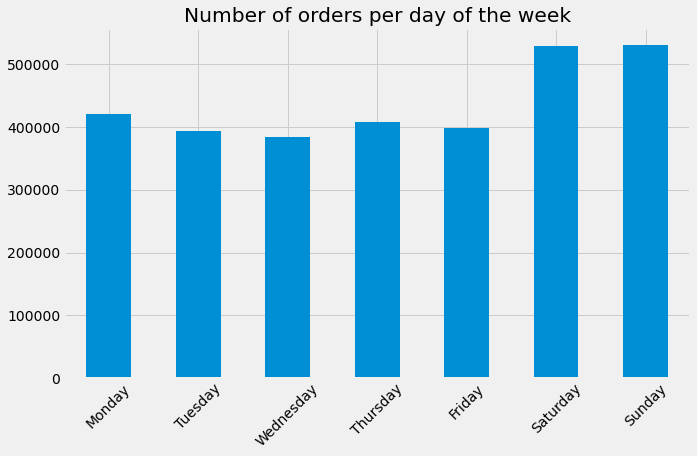

In [44]:
# Plotting a bar chart of the days by number of orders

plt.style.use('fivethirtyeight')
bar_days_orders = plt.figure(figsize = (10,6))

bar_days_orders = df_days_orders.plot(
                    x = 'order_day_of_week',
                    kind = 'bar',
                    title = 'Number of orders per day of the week',
                    xlabel = ''
                    )
plt.xticks(rotation = 45)


### 3.1.2 Busiest time of the day by the number of orders

In [45]:
# Creating a dataframe with number of orders per day

df_hours_orders = df_opc.groupby('order_hour_of_day')['order_id'].nunique()

df_hours_orders

order_hour_of_day
0      20291
1      10975
2       6684
3       4850
4       4909
5       8554
6      27753
7      83635
8     161957
9     233810
10    260111
11    255570
12    243656
13    248713
14    252849
15    252989
16    243328
17    203002
18    161931
19    124716
20     93341
21     70100
22     54834
23     35817
Name: order_id, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23')])

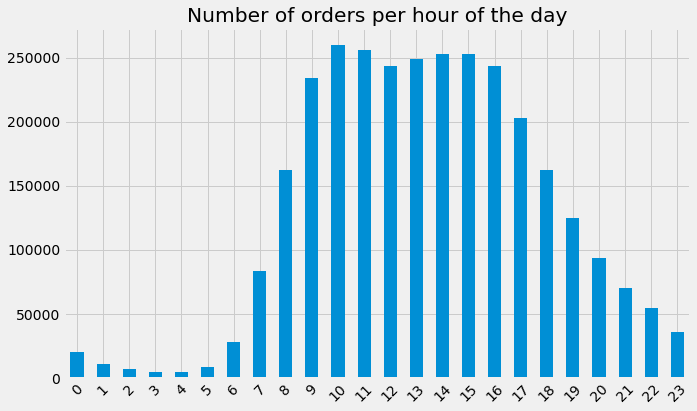

In [46]:
# Plotting a bar chart of the hours of the day by number of orders

plt.style.use('fivethirtyeight')
bar_hours_orders = plt.figure(figsize = (10,6))

bar_hours_orders = df_hours_orders.plot(
                    x = 'order_hour_of_day',
                    kind = 'bar',
                    title = 'Number of orders per hour of the day',
                    xlabel = ''
                    )
plt.xticks(rotation = 45)

### 3.1.3 Hours of the day by the sum and the mean of the unit prices

In [47]:
# Creating a dataframe with the sum of the unit prices per hour of the day

df_hours_sum_prices = df_opc.groupby('order_hour_of_day').agg({'prices': ['mean', 'sum']}).reset_index()

df_hours_sum_prices

order_hour_of_day    prices            
                          mean         sum
0                  0  7.811935   1625007.5
1                  1  7.806720    855655.6
2                  2  7.803857    512533.9
3                  3  7.829993    381978.4
4                  4  7.842191    398014.7
5                  5  7.831289    660968.6
6                  6  7.819828   2197137.1
7                  7  7.821447   6750581.7
8                  8  7.789950  12922482.5
9                  9  7.752057  18320180.5
10                10  7.748280  20527804.2
11                11  7.770356  20315206.0
12                12  7.790153  19439454.0
13                13  7.792976  19785688.3
14                14  7.802532  20033134.3
15                15  7.805518  19791374.1
16                16  7.802230  18828684.5
17                17  7.807258  15473930.3
18                18  7.809190  12111382.2
19                19  7.794600   9304110.2
20                20  7.800477   7260387.3
21                21  7.805775   5955876.5
22                22  7.816767   4744754.1
23                23  7.796599   2997909.1

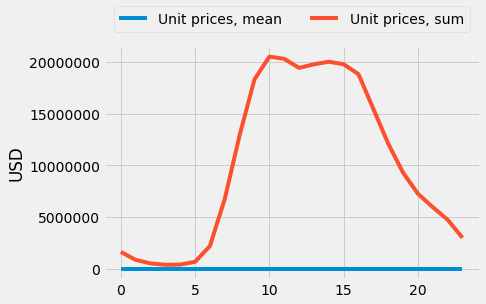

In [48]:
# Plotting a bar chart of the hours of the day by the sum of unit prices per order

line_hours_sum_prices = df_hours_sum_prices.plot(
                    x = 'order_hour_of_day',
                    kind = 'line',
                    xlabel = '',
                    ylabel = 'USD'
                    )
plt.ticklabel_format(style='plain')

# Plotting the legend

plt.gca().legend([('Unit prices, mean'), ('Unit prices, sum')],
                 loc = 'upper center', ncol = 2,
                 bbox_to_anchor=(0.5, 1.2))

## 3.2 Products analysis

### 3.2.1 Products per price range

In [49]:
# Creating a dataframe with number of products per price range

df_price_range = df_opc.groupby('price_range')['product_id'].nunique()

df_price_range

price_range
High-end product        547
Low-end product       16280
Middle-end product    32802
Name: product_id, dtype: int64

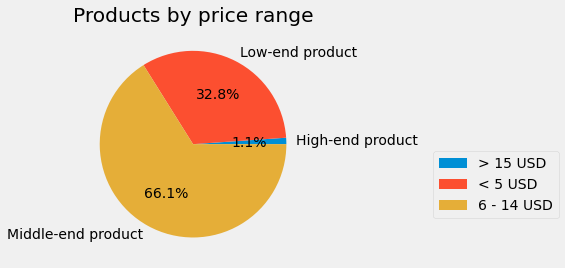

In [50]:
# Plotting a pie chart of the price range column

plt.style.use('fivethirtyeight')

pie_price_range = df_price_range.plot(
                    y = 'product_id',
                    autopct='%1.1f%%',
                    kind = 'pie',
                    title = 'Products by price range',
                    ylabel = ''
                    )

# Plotting the legend

plt.gca().legend([('> 15 USD'), ('< 5 USD'), ('6 - 14 USD')],
                 loc = 'upper left', bbox_to_anchor = (1.5, 0.5))

### 3.2.2 Product popularity by department

In [51]:
# Creating a dataframe with the number of bought products per department

df_prod_dep = df_opc.groupby('department')['product_id'].count().sort_values(ascending = True).reset_index()

df_prod_dep

,department,product_id
0,bulk,33451
1,other,34411
2,missing,64768
3,pets,93060
4,alcohol,144627
5,international,255991
6,babies,410392
7,personal care,424306
8,breakfast,670850
9,meat seafood,674781


<Figure size 1440x720 with 0 Axes>

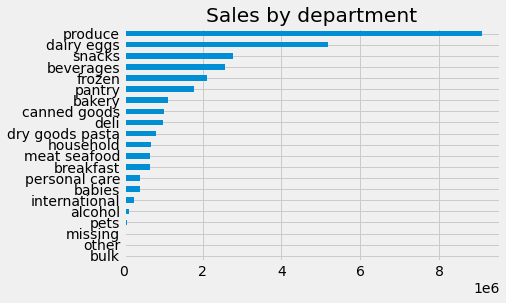

In [52]:
# Plotting a bar chart of departments by popularity

plt.style.use('fivethirtyeight')
bar_prod_dep = plt.figure(figsize = (20,10))

bar_prod_dep = df_prod_dep.plot(
                    kind = 'barh',
                    x = 'department',
                    title = 'Sales by department',
                    xlabel = '',
                    legend = None
                    )
plt.rc('ytick', labelsize = 12)

In [53]:
df_unique_prod = df_opc.drop_duplicates(subset = 'product_id')

ct_dep_pricer = pd.crosstab(df_unique_prod['department'],
                            df_unique_prod['price_range'].sort_values(ascending = False),
                            normalize = 'index')

ct_dep_pricer

price_range,High-end product,Low-end product,Middle-end product
department,,,
alcohol,0.000000,0.279734,0.720266
babies,0.000000,0.277108,0.722892
bakery,0.000000,0.275248,0.724752
beverages,0.000000,0.288303,0.711697
breakfast,0.000000,0.298293,0.701707
bulk,0.000000,0.157895,0.842105
canned goods,0.000000,0.283118,0.716882
dairy eggs,0.000581,0.286461,0.712958
deli,0.000000,0.300000,0.700000


In [54]:
# Exporting crosstab

ct_dep_pricer.to_clipboard()

In [55]:
# Average prices by department

avg_price_dep = df_opc.groupby('department')['prices'].mean().reset_index()

avg_price_dep

,department,prices
0,alcohol,8.150699
1,babies,7.634399
2,bakery,7.857482
3,beverages,7.682556
4,breakfast,8.031647
5,bulk,8.346919
6,canned goods,7.546660
7,dairy eggs,8.336372
8,deli,7.783347
9,dry goods pasta,7.349370


## 3.3 Customer analysis

### 3.3.1 Customers and brand loyalty

In [56]:
# Creating a dataframe with number of customers per loyalty group

df_cust_loyalty = df_opc.groupby('loyalty_flag')['user_id'].nunique()

df_cust_loyalty

loyalty_flag
Loyal customer      17017
New customer        68750
Regular customer    76864
Name: user_id, dtype: int64

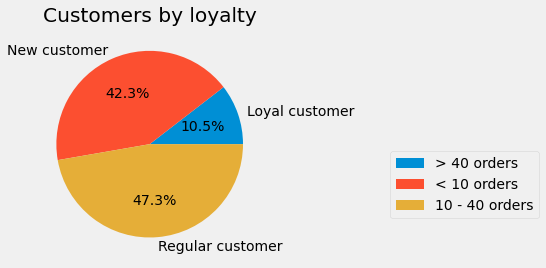

In [57]:
# Plotting a pie chart of the customers by loyalty group

plt.style.use('fivethirtyeight')

pie_cust_loyalty = df_cust_loyalty.plot(
                    y = 'user_id',
                    autopct='%1.1f%%',
                    kind = 'pie',
                    title = 'Customers by loyalty',
                    ylabel = '',
                    )

# Plotting the legend

plt.gca().legend([('> 40 orders'), ('< 10 orders'), ('10 - 40 orders')],
                 loc = 'upper left', bbox_to_anchor = (1.5, 0.5))

In [58]:
# Grouping the df_opc by loyalty flag and prices and finding the basic descriptive statistics for each group

df_opc.groupby('loyalty_flag').agg({'prices': ['mean', 'min', 'max']})

prices           
                      mean  min   max
loyalty_flag                         
Loyal customer    7.773575  1.0  25.0
New customer      7.801665  1.0  25.0
Regular customer  7.798262  1.0  25.0

In [59]:
# Creating a dataframe with number of orders by loyalty groups

df_cust_loyalty_orders = df_opc.groupby('loyalty_flag')['user_id'].nunique()

df_cust_loyalty_orders

loyalty_flag
Loyal customer      17017
New customer        68750
Regular customer    76864
Name: user_id, dtype: int64

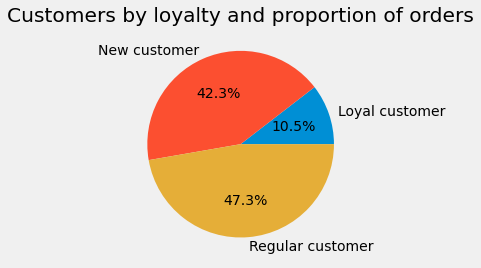

In [60]:
# Plotting a pie chart of the customers by loyalty and number of orders

plt.style.use('fivethirtyeight')

pie_cust_loyalty_orders = df_cust_loyalty_orders.plot(
                            y = 'order_id',
                            autopct='%1.1f%%',
                            kind = 'pie',
                            title = 'Customers by loyalty and proportion of orders',
                            ylabel = '',
                            )

In [61]:
# Creating a crosstab of number of customers per region and loyalty

ct_cust_reg_loy = pd.crosstab(
                        df_opc['region'], df_opc['loyalty_flag'],
                        values = df_opc['user_id'], aggfunc = 'nunique',
                        dropna = False)

ct_cust_reg_loy

loyalty_flag,Loyal customer,New customer,Regular customer
region,,,
Midwest,3991,16190,18195
Northeast,3027,12062,13492
South,5637,22947,25609
West,4362,17551,19568


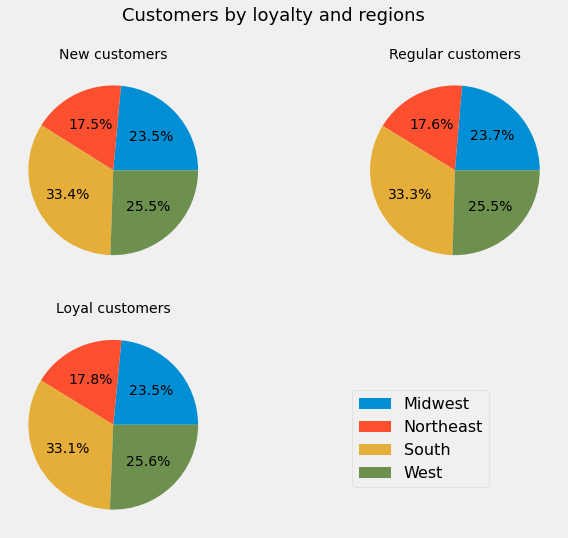

In [62]:
# Plotting pie charts with proportions of customers by region and loyalty

pie_cust_reg_loy = plt.figure(figsize = (10,8))
plt.suptitle('Customers by loyalty and regions', fontsize = 18)

ax1 = plt.subplot2grid((2,2), (1,0))
plt.pie(
    ct_cust_reg_loy['Loyal customer'],
    autopct='%1.1f%%',
    )
plt.title('Loyal customers', fontsize = 14)

ax2 = plt.subplot2grid((2,2), (0,0))
plt.pie(
    ct_cust_reg_loy['New customer'],
    autopct='%1.1f%%',
    )
plt.title('New customers', fontsize = 14)

ax3 = plt.subplot2grid((2,2), (0,1))
plt.pie(
    ct_cust_reg_loy['Regular customer'],
    autopct='%1.1f%%',
    )
plt.title('Regular customers', fontsize = 14)

# Plotting the legend

plt.gca().legend([('Midwest'), ('Northeast'), ('South'), ('West')],
                bbox_to_anchor = (0.7, -0.5),
                prop = {'size': 16})

In [63]:
# Creating a crosstab of price range and loyalty

ct_cust_pricer_loy = pd.crosstab(
                        df_opc['price_range'], df_opc['loyalty_flag'],
                        values = df_opc['user_id'], aggfunc = 'nunique',
                        dropna = False)

ct_cust_pricer_loy

loyalty_flag,Loyal customer,New customer,Regular customer
price_range,,,
High-end product,11356,26338,41951
Low-end product,17007,68245,76743
Middle-end product,17016,68638,76829


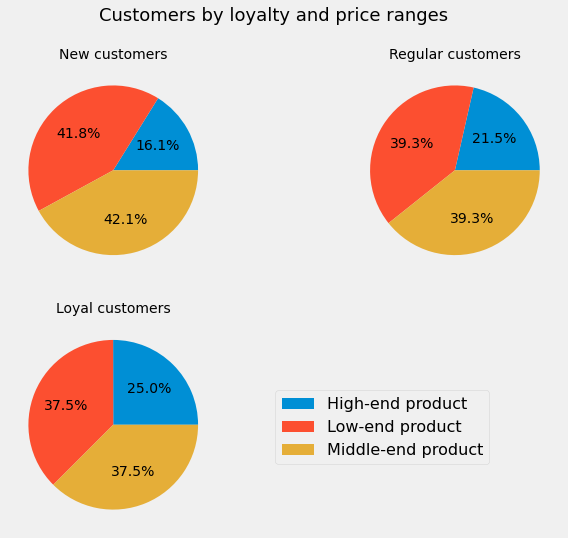

In [64]:
# Plotting pie charts with proportions of customers by price range and loyalty

pie_cust_pricer_loy = plt.figure(figsize = (10,8))
plt.suptitle('Customers by loyalty and price ranges', size = 18)

ax1 = plt.subplot2grid((2,2), (1,0))
plt.pie(
    ct_cust_pricer_loy['Loyal customer'],
    autopct='%1.1f%%',
    )
plt.title('Loyal customers', size = 14)

ax2 = plt.subplot2grid((2,2), (0,0))
plt.pie(
    ct_cust_pricer_loy['New customer'],
    autopct='%1.1f%%',
    )
plt.title('New customers', size = 14)

ax3 = plt.subplot2grid((2,2), (0,1))
plt.pie(
    ct_cust_pricer_loy['Regular customer'],
    autopct='%1.1f%%',
    )
plt.title('Regular customers', size = 14)

# Plotting the legend

plt.gca().legend([('High-end product'), ('Low-end product'), ('Middle-end product')],
                bbox_to_anchor = (0.7, -0.5),
                prop = {'size': 16})

### 3.3.2 Customers and ordering habits

In [65]:
# Listing number of products per department

df_num_prod_dep = df_opc.groupby('department')['product_id'].nunique().reset_index()

df_num_prod_dep

,department,product_id
0,alcohol,1051
1,babies,1080
2,bakery,1515
3,beverages,4360
4,breakfast,1113
5,bulk,38
6,canned goods,2091
7,dairy eggs,3442
8,deli,1320
9,dry goods pasta,1858


In [66]:
df_prod_dep_1 = df_opc.groupby('department')['product_id'].count().reset_index()

df_prod_dep_1

,department,product_id
0,alcohol,144627
1,babies,410392
2,bakery,1120828
3,beverages,2571901
4,breakfast,670850
5,bulk,33451
6,canned goods,1012074
7,dairy eggs,5177182
8,deli,1003834
9,dry goods pasta,822136


Text(0.5, 1.0, 'Relationship between sold quantities and the size of the department')

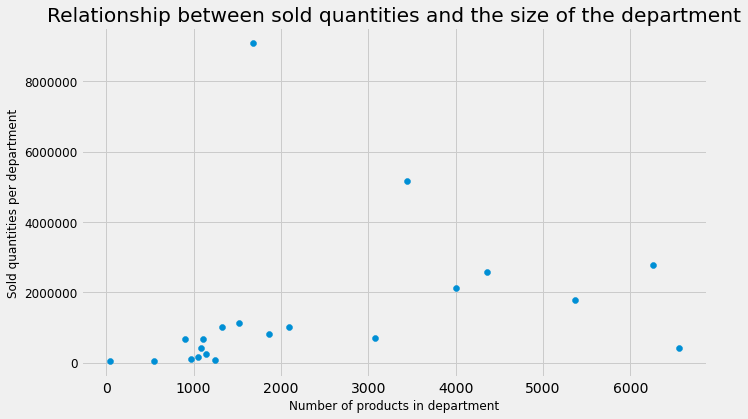

In [67]:
# Cross-referencing number of products per department and sales

scatt_prod_dep = plt.figure(figsize = (10,6))
plt.ticklabel_format(style='plain')
scatt_prod_dep = plt.scatter(x = df_num_prod_dep['product_id'], y = df_prod_dep_1['product_id'],
                            )
plt.xlabel('Number of products in department', size = 12)
plt.ylabel('Sold quantities per department', size = 12)
plt.title('Relationship between sold quantities and the size of the department')

In [68]:
# Cross-referencing gender and the quantity of bought products

df_gender_spending = df_opc.groupby('gender')['product_id'].count()

df_gender_spending

gender
Female    15377824
Male      15586740
Name: product_id, dtype: int64

In [69]:
# Cross-referencing gender and the number of placed orders

df_gender_orders = df_opc.groupby('gender')['order_id'].nunique()

df_gender_orders

gender
Female    1519939
Male      1544436
Name: order_id, dtype: int64

In [70]:
# Cross-referencing gender and the number of unique bought products

df_gender_spending_uniq = df_opc.groupby('gender')['product_id'].nunique()

df_gender_spending_uniq

gender
Female    48935
Male      48944
Name: product_id, dtype: int64

In [71]:
# Cross-referencing gender and spender flag

ct_gender_spender = pd.crosstab(
                        df_opc['spender_flag'], df_opc['gender'],
                        values = df_opc['user_id'], aggfunc = 'nunique'
                        )
    
ct_gender_spender

gender,Female,Male
spender_flag,,
High spender,1835,1866
Low spender,78798,80132


In [72]:
# Summary statistics for gender, by price

gender_sums_price = df_opc.groupby('gender').agg({'prices': ['min', 'mean', 'max']})

gender_sums_price

prices                
          min      mean   max
gender                       
Female    1.0  7.788193  25.0
Male      1.0  7.792956  25.0

In [73]:
# Summary statistics for gender, by ordering frequency

gender_sums_freq = df_opc.groupby('gender').agg({'median_days_between_orders': ['min', 'mean', 'max']})

gender_sums_freq

median_days_between_orders                
                              min      mean   max
gender                                           
Female                        0.0  9.938001  30.0
Male                          0.0  9.976022  30.0

### 3.3.3 Geographical analysis

In [74]:
# Distribution of customers per region

df_customers_region = df_opc.groupby('region')['user_id'].nunique()

df_customers_region

region
Midwest      38376
Northeast    28581
South        54193
West         41481
Name: user_id, dtype: int64

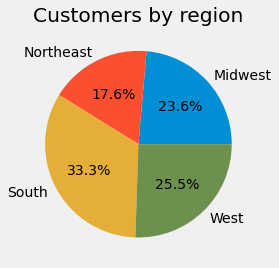

In [75]:
# Plotting a pie chart of distribution of customers per regions

pie_customers_region = df_customers_region.plot(
                            autopct='%1.1f%%',
                            kind = 'pie',
                            title = 'Customers by region',
                            ylabel = ''
                            )

In [76]:
# Cross-referencing region and number of orders

df_region_orders = df_opc.groupby('region')['order_id'].nunique()

df_region_orders

region
Midwest       719292
Northeast     540199
South        1021379
West          783505
Name: order_id, dtype: int64

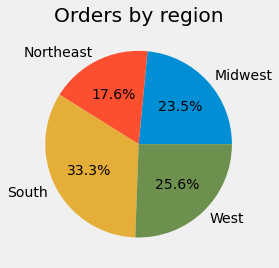

In [77]:
# Plotting a pie chart of distribution of orders per regions

pie_region_order = df_region_orders.plot(
                            autopct='%1.1f%%',
                            kind = 'pie',
                            title = 'Orders by region',
                            ylabel = ''
                            )

In [78]:
# Customers by order frequency

df_cust_freq = df_opc.groupby('frequency_flag')['user_id'].nunique()

df_cust_freq

frequency_flag
Frequent customer        75927
Non-frequent customer    36665
Regular customer         50039
Name: user_id, dtype: int64

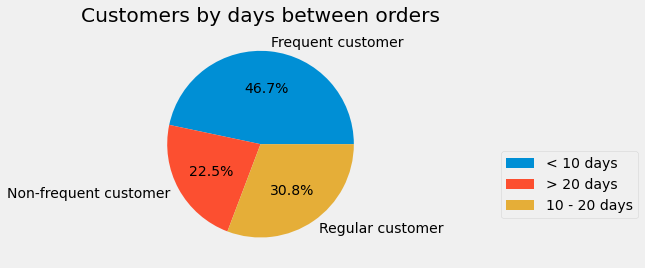

In [79]:
# Plotting pie chart of customers by order frequency

pie_cust_freq = df_cust_freq.plot(
                            autopct='%1.1f%%',
                            kind = 'pie',
                            title = 'Customers by days between orders',
                            ylabel = ''
                            )

# Plotting the legend

plt.gca().legend([('< 10 days'), ('> 20 days'), ('10 - 20 days')],
                 loc = 'upper left', bbox_to_anchor = (1.5, 0.5))

In [80]:
# Cross-referencing days between orders and regions

ct_freq_region = pd.crosstab(
                        df_opc['frequency_flag'], df_opc['region'],
                        values = df_opc['user_id'], aggfunc = 'nunique',
                        dropna = False
                        )

ct_freq_region

region,Midwest,Northeast,South,West
frequency_flag,,,,
Frequent customer,17794,13345,25314,19474
Non-frequent customer,8743,6325,12277,9320
Regular customer,11839,8911,16602,12687


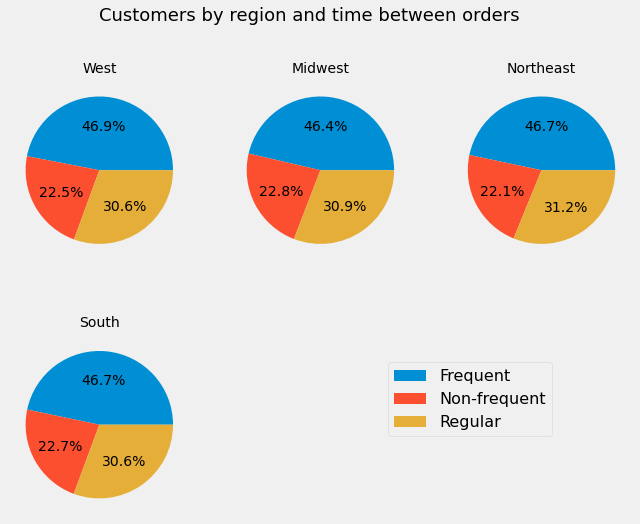

In [81]:
# Plotting pie charts with proportions of customers by region and the median time between orders

pie_freq_region = plt.figure(figsize = (10,8))
plt.suptitle('Customers by region and time between orders', fontsize = 18)

ax1 = plt.subplot2grid((2,3), (0,1))
plt.pie(
    ct_freq_region['Midwest'],
    autopct='%1.1f%%',
    )
plt.title('Midwest', fontsize = 14)

ax2 = plt.subplot2grid((2,3), (0,2))
plt.pie(
    ct_freq_region['Northeast'],
    autopct='%1.1f%%',
    )
plt.title('Northeast', fontsize = 14)

ax3 = plt.subplot2grid((2,3), (1,0))
plt.pie(
    ct_freq_region['South'],
    autopct='%1.1f%%',
    )
plt.title('South', fontsize = 14)

ax4 = plt.subplot2grid((2,3), (0,0))
plt.pie(
    ct_freq_region['West'],
    autopct='%1.1f%%',
    )
plt.title('West', fontsize = 14)

# Plotting the legend

plt.gca().legend([('Frequent'), ('Non-frequent'), ('Regular')],
                bbox_to_anchor = (3, -0.5),
                prop = {'size': 16})

In [82]:
# Customers by spending habits

df_cust_spender = df_opc.groupby('spender_flag')['user_id'].nunique()

df_cust_spender

spender_flag
High spender      3701
Low spender     158930
Name: user_id, dtype: int64

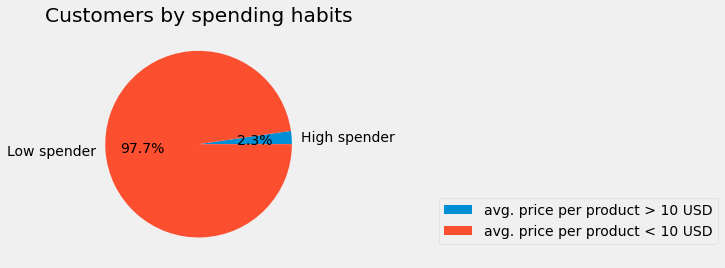

In [83]:
# Plotting pie chart of customers by spending habits

pie_cust_spender = df_cust_spender.plot(
                            autopct='%1.1f%%',
                            kind = 'pie',
                            title = 'Customers by spending habits',
                            ylabel = ''
                            )

# Plotting the legend

plt.gca().legend([('avg. price per product > 10 USD'), ('avg. price per product < 10 USD'), ('10 - 40 orders')],
                 loc = 'upper left', bbox_to_anchor = (1.5, 0.3))

In [84]:
# Cross-referencing high/low spender flag and regions

ct_spender_region = pd.crosstab(
                        df_opc['spender_flag'], df_opc['region'],
                        values = df_opc['user_id'], aggfunc = 'nunique',
                        dropna = False
                        )

ct_spender_region

region,Midwest,Northeast,South,West
spender_flag,,,,
High spender,883,613,1259,946
Low spender,37493,27968,52934,40535


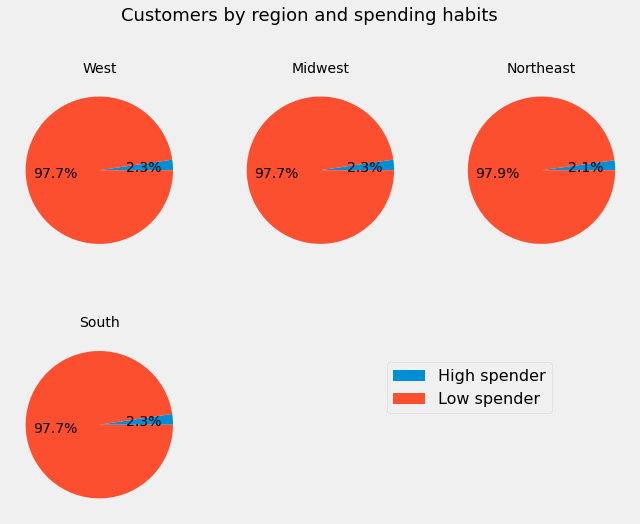

In [85]:
# Plotting pie charts with proportions of customers by region and the spending habits

pie_spender_region = plt.figure(figsize=(10,8))
plt.suptitle('Customers by region and spending habits', fontsize = 18)

ax1 = plt.subplot2grid((2,3), (0,1))
plt.pie(
    ct_spender_region['Midwest'],
    autopct='%1.1f%%',
    )
plt.title('Midwest', fontsize = 14)

ax2 = plt.subplot2grid((2,3), (0,2))
plt.pie(
    ct_spender_region['Northeast'],
    autopct='%1.1f%%',
    )
plt.title('Northeast', fontsize = 14)

ax3 = plt.subplot2grid((2,3), (1,0))
plt.pie(
    ct_spender_region['South'],
    autopct='%1.1f%%',
    )
plt.title('South', fontsize = 14)

ax4 = plt.subplot2grid((2,3), (0,0))
plt.pie(
    ct_spender_region['West'],
    autopct='%1.1f%%',
    )
plt.title('West', fontsize = 14)

# Plotting the legend

plt.gca().legend([('High spender'), ('Low spender')],
                bbox_to_anchor = (3, -0.5),
                prop = {'size': 16})

In [86]:
# Summary statistics for regions, by price

regions_sums_price = df_opc.groupby('region').agg({'prices': ['min', 'mean', 'max']})

regions_sums_price

prices                
             min      mean   max
region                          
Midwest      1.0  7.792318  25.0
Northeast    1.0  7.781441  25.0
South        1.0  7.794439  25.0
West         1.0  7.790308  25.0

In [87]:
# Summary statistics for regions, by ordering frequency

regions_sums_freq = df_opc.groupby('region').agg({'median_days_between_orders': ['min', 'mean', 'max']})

regions_sums_freq

median_days_between_orders                 
                                 min       mean   max
region                                               
Midwest                          0.0  10.019931  30.0
Northeast                        0.0   9.924985  30.0
South                            0.0   9.955835  30.0
West                             0.0   9.923485  30.0

### 3.3.4 Demographical analysis - age

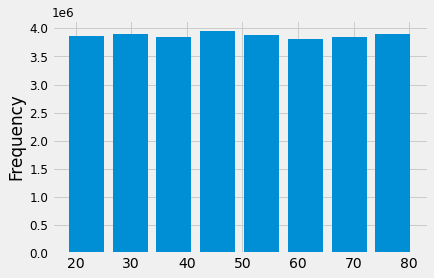

In [88]:
# Plotting a histogram of customers by age

hist_age = df_opc['age'].plot.hist(bins = 8, rwidth = 0.8)

In [89]:
# Distribution of customers per age groups

df_customers_ageg = df_opc.groupby('age_group')['user_id'].nunique()

df_customers_ageg

age_group
Adult          50622
Middle age     38470
Senior         55773
Young adult    17766
Name: user_id, dtype: int64

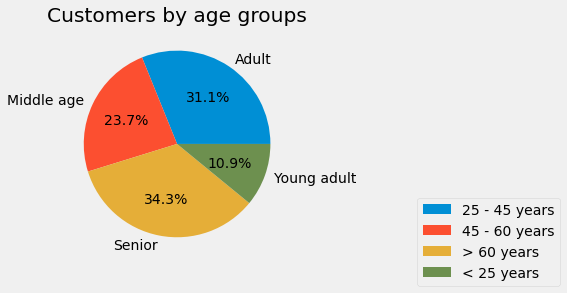

In [90]:
# Plotting a pie chart of distribution of customers per age groups

pie_customers_ageg = df_customers_ageg.plot(
                            autopct='%1.1f%%',
                            kind = 'pie',
                            title = 'Customers by age groups',
                            ylabel = ''
                            )

# Plotting the legend

plt.gca().legend([('25 - 45 years'), ('45 - 60 years'), ('> 60 years'), ('< 25 years')],
                 loc = 'upper left', bbox_to_anchor = (1.5, 0.3))

In [91]:
# Cross-referencing age groups and number of orders

df_ageg_orders = df_opc.groupby('age_group')['order_id'].nunique()

df_ageg_orders

age_group
Adult           952863
Middle age      725351
Senior         1049904
Young adult     336257
Name: order_id, dtype: int64

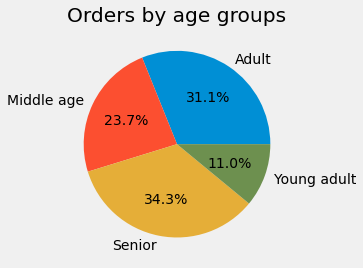

In [92]:
# Plotting a pie chart of distribution of orders per age groups

pie_ageg_order = df_ageg_orders.plot(
                            autopct='%1.1f%%',
                            kind = 'pie',
                            title = 'Orders by age groups',
                            ylabel = ''
                            )

In [93]:
# Cross-referencing days between orders and age groups

ct_freq_ageg = pd.crosstab(
                        df_opc['frequency_flag'], df_opc['age_group'],
                        values = df_opc['user_id'], aggfunc = 'nunique',
                        dropna = False
                        )

ct_freq_ageg

age_group,Adult,Middle age,Senior,Young adult
frequency_flag,,,,
Frequent customer,23618,17920,26063,8326
Non-frequent customer,11356,8782,12530,3997
Regular customer,15648,11768,17180,5443


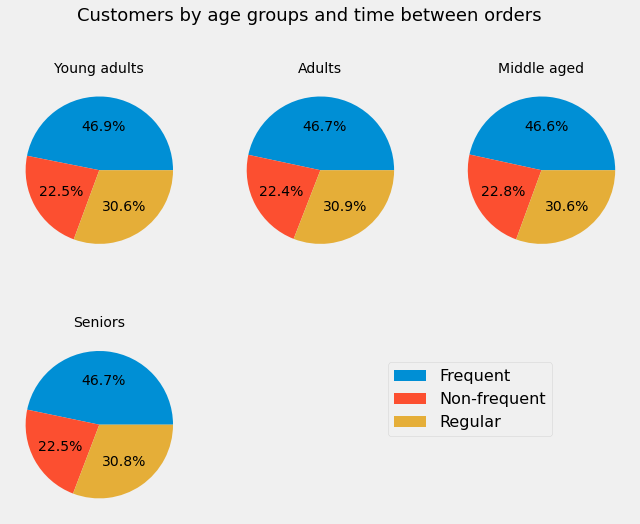

In [94]:
# Plotting pie charts with proportions of customers by age groups and the median time between orders

pie_freq_ageg = plt.figure(figsize = (10,8))
plt.suptitle('Customers by age groups and time between orders', fontsize = 18)

ax1 = plt.subplot2grid((2,3), (0,1))
plt.pie(
    ct_freq_ageg['Adult'],
    autopct='%1.1f%%',
    )
plt.title('Adults', fontsize = 14)

ax2 = plt.subplot2grid((2,3), (0,2))
plt.pie(
    ct_freq_ageg['Middle age'],
    autopct='%1.1f%%',
    )
plt.title('Middle aged', fontsize = 14)

ax3 = plt.subplot2grid((2,3), (1,0))
plt.pie(
    ct_freq_ageg['Senior'],
    autopct='%1.1f%%',
    )
plt.title('Seniors', fontsize = 14)

ax4 = plt.subplot2grid((2,3), (0,0))
plt.pie(
    ct_freq_ageg['Young adult'],
    autopct='%1.1f%%',
    )
plt.title('Young adults', fontsize = 14)

# Plotting the legend

plt.gca().legend([('Frequent'), ('Non-frequent'), ('Regular')],
                bbox_to_anchor = (3, -0.5),
                prop = {'size': 16})

In [95]:
# Cross-referencing high/low spender flag and age groups

ct_spender_ageg = pd.crosstab(
                        df_opc['spender_flag'], df_opc['age_group'],
                        values = df_opc['user_id'], aggfunc = 'nunique',
                        dropna = False
                        )

ct_spender_ageg

age_group,Adult,Middle age,Senior,Young adult
spender_flag,,,,
High spender,1120,937,1248,396
Low spender,49502,37533,54525,17370


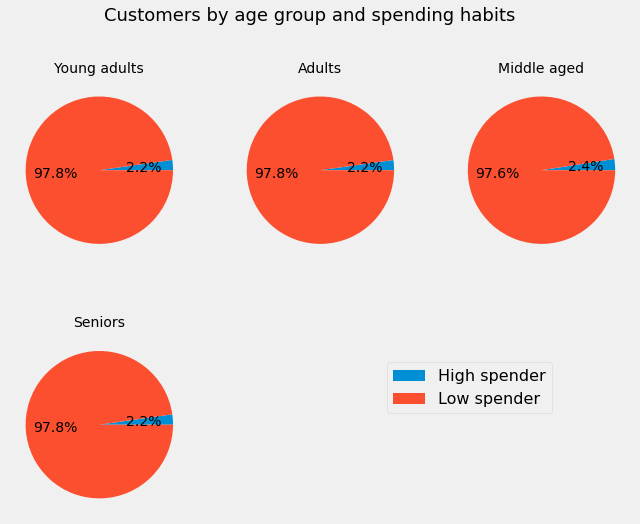

In [96]:
# Plotting pie charts with proportions of customers by age group and the spending habits

pie_spender_ageg = plt.figure(figsize = (10,8))
plt.suptitle('Customers by age group and spending habits', fontsize = 18)

ax1 = plt.subplot2grid((2,3), (0,1))
plt.pie(
    ct_spender_ageg['Adult'],
    autopct='%1.1f%%',
    )
plt.title('Adults', fontsize = 14)

ax2 = plt.subplot2grid((2,3), (0,2))
plt.pie(
    ct_spender_ageg['Middle age'],
    autopct='%1.1f%%',
    )
plt.title('Middle aged', fontsize = 14)

ax3 = plt.subplot2grid((2,3), (1,0))
plt.pie(
    ct_spender_ageg['Senior'],
    autopct='%1.1f%%',
    )
plt.title('Seniors', fontsize = 14)

ax4 = plt.subplot2grid((2,3), (0,0))
plt.pie(
    ct_spender_ageg['Young adult'],
    autopct='%1.1f%%',
    )
plt.title('Young adults', fontsize = 14)

# Plotting the legend

plt.gca().legend([('High spender'), ('Low spender')],
                bbox_to_anchor = (3, -0.5),
                prop = {'size': 16})

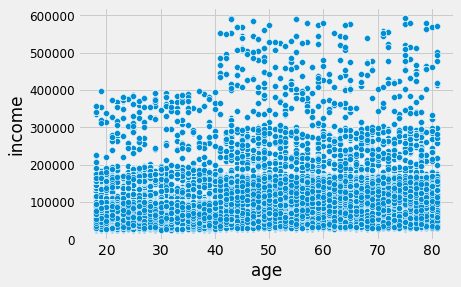

In [97]:
# Creating a scatterplot of 'age' and 'income' columns

scatt_age_inc = sns.scatterplot(x = 'age', y = 'income', data = df_opc)

In [98]:
# Summary statistics for age groups, by price

ageg_sums_price = df_opc.groupby('age_group').agg({'prices': ['min', 'mean', 'max']})

ageg_sums_price

prices                
               min      mean   max
age_group                         
Adult          1.0  7.786899  25.0
Middle age     1.0  7.788404  25.0
Senior         1.0  7.795446  25.0
Young adult    1.0  7.790680  25.0

In [99]:
# Summary statistics for age, by ordering frequency

gender_sums_freq = df_opc.groupby('age_group').agg({'median_days_between_orders': ['min', 'mean', 'max']})

gender_sums_freq

median_days_between_orders                
                                   min      mean   max
age_group                                             
Adult                              0.0  9.957619  30.0
Middle age                         0.0  9.986684  30.0
Senior                             0.0  9.950940  30.0
Young adult                        0.0  9.911733  30.0

### 3.3.5 Demographical analysis - familial status

In [100]:
# Customers by marital status

df_cust_marital = df_opc.groupby('marital_status')['user_id'].nunique()

df_cust_marital

marital_status
divorced/widowed                     13831
living with parents and siblings      7608
married                             114296
single                               26896
Name: user_id, dtype: int64

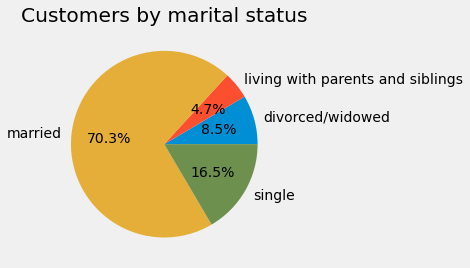

In [101]:
# Plotting a pie chart of customers by marital status

pie_cust_marital = df_cust_marital.plot(
                            autopct='%1.1f%%',
                            kind = 'pie',
                            title = 'Customers by marital status',
                            ylabel = ''
                            )

In [102]:
# Cross-referencing marital status and number of orders

df_marital_orders = df_opc.groupby('marital_status')['order_id'].nunique()

df_marital_orders

marital_status
divorced/widowed                     261329
living with parents and siblings     145377
married                             2151244
single                               506425
Name: order_id, dtype: int64

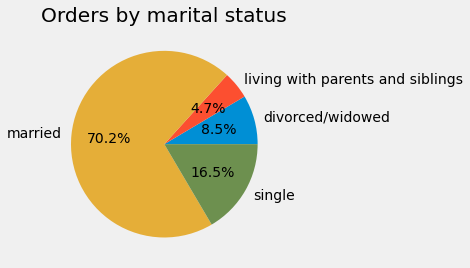

In [103]:
# Plotting a pie chart of distribution of orders per marital status

pie_marital_order = df_marital_orders.plot(
                            autopct='%1.1f%%',
                            kind = 'pie',
                            title = 'Orders by marital status',
                            ylabel = ''
                            )

In [104]:
# Cross-referencing days between orders and marital status

ct_freq_marital = pd.crosstab(
                        df_opc['frequency_flag'], df_opc['marital_status'],
                        values = df_opc['user_id'], aggfunc = 'nunique',
                        dropna = False
                        )

ct_freq_marital

marital_status,divorced/widowed,living with parents and siblings,married,single
frequency_flag,,,,
Frequent customer,6517,3616,53405,12389
Non-frequent customer,3054,1729,25790,6092
Regular customer,4260,2263,35101,8415


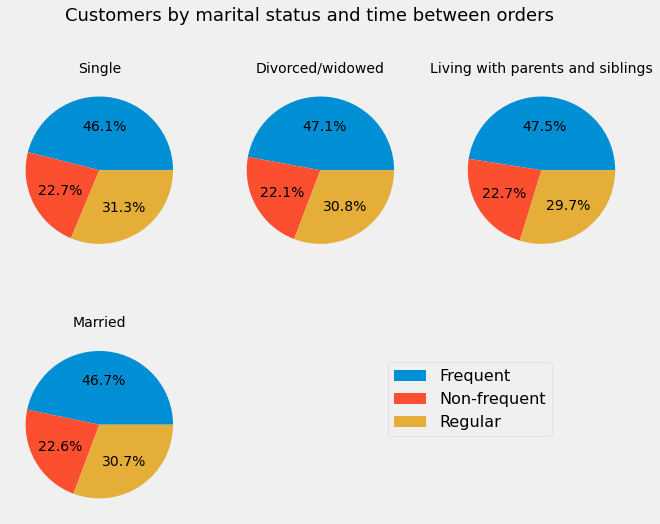

In [105]:
# Plotting pie charts with proportions of customers by marital status and the median time between orders

pie_freq_marital = plt.figure(figsize = (10,8))
plt.suptitle('Customers by marital status and time between orders', fontsize = 18)

ax1 = plt.subplot2grid((2,3), (0,1))
plt.pie(
    ct_freq_marital['divorced/widowed'],
    autopct='%1.1f%%',
    )
plt.title('Divorced/widowed', fontsize = 14)

ax2 = plt.subplot2grid((2,3), (0,2))
plt.pie(
    ct_freq_marital['living with parents and siblings'],
    autopct='%1.1f%%',
    )
plt.title('Living with parents and siblings', fontsize = 14)

ax3 = plt.subplot2grid((2,3), (1,0))
plt.pie(
    ct_freq_marital['married'],
    autopct='%1.1f%%',
    )
plt.title('Married', fontsize = 14)

ax4 = plt.subplot2grid((2,3), (0,0))
plt.pie(
    ct_freq_marital['single'],
    autopct='%1.1f%%',
    )
plt.title('Single', fontsize = 14)

# Plotting the legend

plt.gca().legend([('Frequent'), ('Non-frequent'), ('Regular')],
                bbox_to_anchor = (3, -0.5),
                prop = {'size': 16})

In [106]:
# Cross-referencing high/low spender flag and marital_status

ct_spender_marital = pd.crosstab(
                        df_opc['spender_flag'], df_opc['marital_status'],
                        values = df_opc['user_id'], aggfunc = 'nunique',
                        dropna = False
                        )

ct_spender_marital

marital_status,divorced/widowed,living with parents and siblings,married,single
spender_flag,,,,
High spender,302,169,2606,624
Low spender,13529,7439,111690,26272


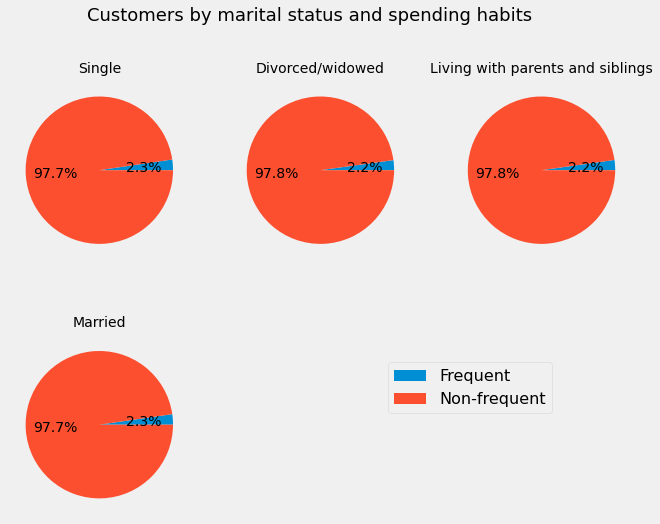

In [107]:
# Plotting pie charts with proportions of customers by marital status and spending habits

pie_spender_marital = plt.figure(figsize = (10,8))
plt.suptitle('Customers by marital status and spending habits', fontsize = 18)

ax1 = plt.subplot2grid((2,3), (0,1))
plt.pie(
    ct_spender_marital['divorced/widowed'],
    autopct='%1.1f%%',
    )
plt.title('Divorced/widowed', fontsize = 14)

ax2 = plt.subplot2grid((2,3), (0,2))
plt.pie(
    ct_spender_marital['living with parents and siblings'],
    autopct='%1.1f%%',
    )
plt.title('Living with parents and siblings', fontsize = 14)

ax3 = plt.subplot2grid((2,3), (1,0))
plt.pie(
    ct_spender_marital['married'],
    autopct='%1.1f%%',
    )
plt.title('Married', fontsize = 14)

ax4 = plt.subplot2grid((2,3), (0,0))
plt.pie(
    ct_spender_marital['single'],
    autopct='%1.1f%%',
    )
plt.title('Single', fontsize = 14)

# Plotting the legend

plt.gca().legend([('Frequent'), ('Non-frequent'), ('Regular')],
                bbox_to_anchor = (3, -0.5),
                prop = {'size': 16})

### 3.3.6 Demographical analysis - income

In [108]:
# Customers by income group

df_cust_income = df_opc.groupby('income_group')['user_id'].nunique()

df_cust_income

income_group
High income       13009
Low income        27133
Middle income    122489
Name: user_id, dtype: int64

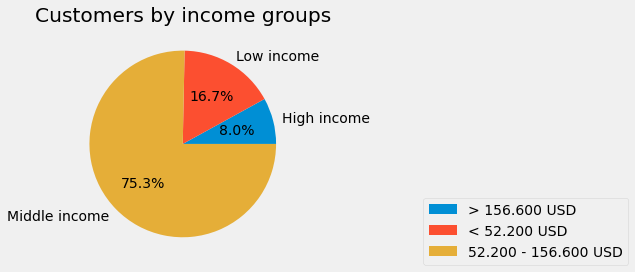

In [109]:
# Plotting a pie chart of customers by income groups

pie_cust_income = df_cust_income.plot(
                            autopct='%1.1f%%',
                            kind = 'pie',
                            title = 'Customers by income groups',
                            ylabel = ''
                            )

# Plotting the legend

plt.gca().legend([('> 156.600 USD'), ('< 52.200 USD'), ('52.200 - 156.600 USD')],
                 loc = 'upper left', bbox_to_anchor = (1.5, 0.3))

In [110]:
# Cross-referencing income groups and number of orders

df_income_orders = df_opc.groupby('income_group')['order_id'].nunique()

df_income_orders

income_group
High income       256372
Low income        464360
Middle income    2343643
Name: order_id, dtype: int64

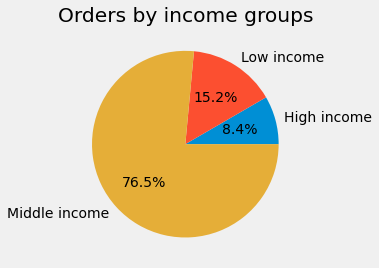

In [111]:
# Plotting a pie chart of distribution of orders per income group

pie_income_orders = df_income_orders.plot(
                            autopct='%1.1f%%',
                            kind = 'pie',
                            title = 'Orders by income groups',
                            ylabel = ''
                            )

In [112]:
# Cross-referencing days between orders and income groups

ct_freq_income = pd.crosstab(
                        df_opc['frequency_flag'], df_opc['income_group'],
                        values = df_opc['user_id'], aggfunc = 'nunique',
                        dropna = False
                        )

ct_freq_income

income_group,High income,Low income,Middle income
frequency_flag,,,
Frequent customer,6341,11509,58077
Non-frequent customer,2708,7150,26807
Regular customer,3960,8474,37605


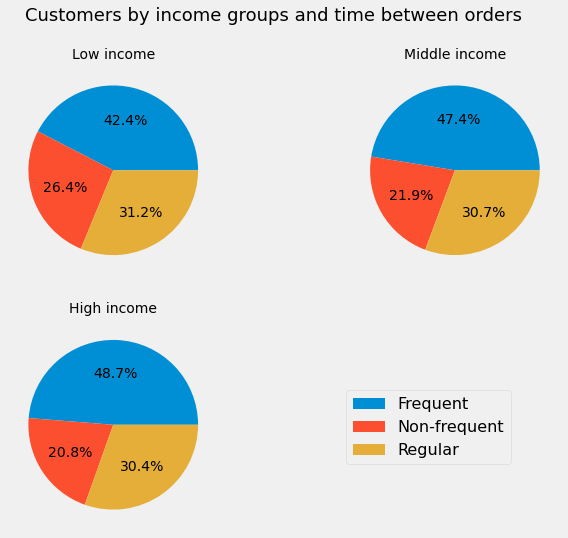

In [113]:
# Plotting pie charts with proportions of customers by income groups and the median time between orders

pie_freq_income = plt.figure(figsize = (10,8))
plt.suptitle('Customers by income groups and time between orders', fontsize = 18)

ax1 = plt.subplot2grid((2,2), (1,0))
plt.pie(
    ct_freq_income['High income'],
    autopct='%1.1f%%',
    )
plt.title('High income', fontsize = 14)

ax2 = plt.subplot2grid((2,2), (0,0))
plt.pie(
    ct_freq_income['Low income'],
    autopct='%1.1f%%',
    )
plt.title('Low income', fontsize = 14)

ax3 = plt.subplot2grid((2,2), (0,1))
plt.pie(
    ct_freq_income['Middle income'],
    autopct='%1.1f%%',
    )
plt.title('Middle income', fontsize = 14)

# Plotting the legend

plt.gca().legend([('Frequent'), ('Non-frequent'), ('Regular')],
                bbox_to_anchor = (0.8, -0.5),
                prop = {'size': 16})

In [114]:
# Cross-referencing spending habits and income groups

ct_spender_income = pd.crosstab(
                        df_opc['spender_flag'], df_opc['income_group'],
                        values = df_opc['user_id'], aggfunc = 'nunique',
                        dropna = False
                        )

ct_spender_income

income_group,High income,Low income,Middle income
spender_flag,,,
High spender,1447,40,2214
Low spender,11562,27093,120275


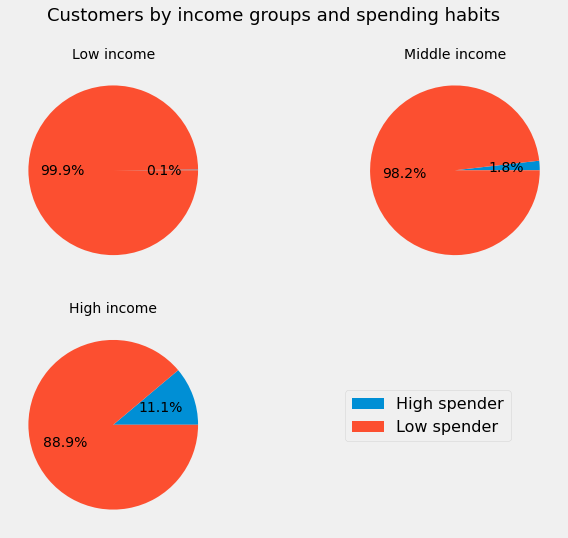

In [115]:
# Plotting pie charts with proportions of customers by income groups and spending habits

pie_spender_income = plt.figure(figsize = (10,8))
plt.suptitle('Customers by income groups and spending habits', fontsize = 18)

ax1 = plt.subplot2grid((2,2), (1,0))
plt.pie(
    ct_spender_income['High income'],
    autopct='%1.1f%%',
    )
plt.title('High income', fontsize = 14)

ax2 = plt.subplot2grid((2,2), (0,0))
plt.pie(
    ct_spender_income['Low income'],
    autopct='%1.1f%%',
    )
plt.title('Low income', fontsize = 14)

ax3 = plt.subplot2grid((2,2), (0,1))
plt.pie(
    ct_spender_income['Middle income'],
    autopct='%1.1f%%',
    )
plt.title('Middle income', fontsize = 14)

# Plotting the legend

plt.gca().legend([('High spender'), ('Low spender')],
                bbox_to_anchor = (0.8, -0.5),
                prop = {'size': 16})

In [116]:
# Cross-referencing income groups and departments, total sales

ct_income_dept = pd.crosstab(df_opc['department'], df_opc['income_group'],
                                        values = df_opc['product_id'], aggfunc = 'sum',
                                        normalize = 'columns'
                                        )

ct_income_dept

income_group,High income,Low income,Middle income
department,,,
alcohol,0.006954,0.005370,0.004452
babies,0.013109,0.009111,0.013525
bakery,0.036451,0.029825,0.034159
beverages,0.080078,0.108740,0.077003
breakfast,0.021894,0.027551,0.021662
bulk,0.000681,0.000719,0.000785
canned goods,0.031175,0.022000,0.030911
dairy eggs,0.168273,0.151897,0.167607
deli,0.032551,0.031698,0.032591


In [117]:
ct_income_dept.to_clipboard()

In [118]:
# Cross-referencing income groups and departments, unique products

ct_income_depup = pd.crosstab(df_opc['department'], df_opc['income_group'],
                                        values = df_opc['product_id'], aggfunc = 'nunique',
                                        normalize = 'columns'
                                        )

ct_income_depup

income_group,High income,Low income,Middle income
department,,,
alcohol,0.018406,0.019191,0.020984
babies,0.022387,0.021023,0.021792
bakery,0.032479,0.032282,0.030597
beverages,0.087847,0.090337,0.087814
breakfast,0.023514,0.024374,0.022458
bulk,0.000902,0.000892,0.000767
canned goods,0.043823,0.041420,0.042170
dairy eggs,0.076353,0.074618,0.069455
deli,0.028473,0.027726,0.026619


In [119]:
ct_income_depup.to_clipboard()

In [120]:
# Summary statistics for gender, by price

gender_sums_price = df_opc.groupby('gender').agg({'prices': ['min', 'mean', 'max']})

gender_sums_price

prices                
          min      mean   max
gender                       
Female    1.0  7.788193  25.0
Male      1.0  7.792956  25.0

In [121]:
# Summary statistics for gender, by ordering frequency

gender_sums_freq = df_opc.groupby('gender').agg({'median_days_between_orders': ['min', 'mean', 'max']})

gender_sums_freq

median_days_between_orders                
                              min      mean   max
gender                                           
Female                        0.0  9.938001  30.0
Male                          0.0  9.976022  30.0

## 3.4 Customer profiling

### 3.4.1 Income and age

In [122]:
# Cross-referencing income and age groups by number of customers

ct_income_age_cust = pd.crosstab(
                    df_opc['income_group'], df_opc['age_group'],
                    values = df_opc['user_id'], aggfunc = 'nunique',
                    normalize = 'index'
                    )

ct_income_age_cust

age_group,Adult,Middle age,Senior,Young adult
income_group,,,,
High income,0.115535,0.360827,0.515950,0.007687
Low income,0.389894,0.191464,0.271256,0.147385
Middle income,0.314640,0.233335,0.340447,0.111577


In [123]:
# Cross-tab for labels

ct_iac_labels = pd.crosstab(
                    df_opc['income_group'], df_opc['age_group'],
                    values = df_opc['user_id'], aggfunc = 'nunique'
                    )

<AxesSubplot:title={'center':'Customers by income and age groups'}>

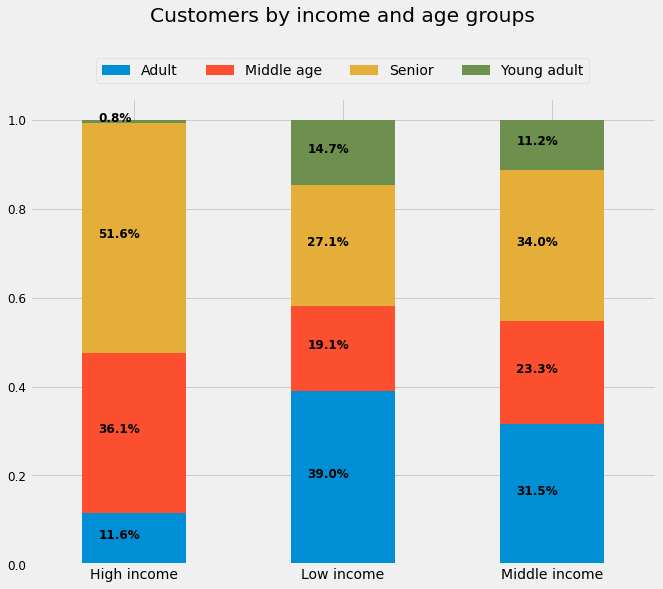

In [124]:
# Plotting the bar chart of distribution of customers in income and age groups

bar_income_age_cust = ct_income_age_cust.plot(
                        kind = 'bar',
                        stacked = True,
                        figsize = (10, 8),
                        xlabel = '',
                        )

plt.xticks(rotation = 0)
plt.legend(loc = 'upper center', ncol = 4, bbox_to_anchor = (0.5, 1.1))
plt.title(label = 'Customers by income and age groups', x = 0.5, y = 1.15)

for n, x in enumerate([*ct_iac_labels.index.values]):
    for (proportion, y_loc) in zip(ct_income_age_cust.loc[x],
                                   ct_income_age_cust.loc[x].cumsum()):
                
        plt.text(x = n - 0.17,
                 y = (y_loc - proportion) + (proportion / 2),
                 s = f'{np.round(proportion * 100, 1)}%', 
                 color = 'black',
                 fontsize = 12,
                 fontweight = 'bold')

bar_income_age_cust

In [125]:
# Cross-referencing income and age groups by value of bought products

ct_income_age_sales = pd.crosstab(
                    df_opc['income_group'], df_opc['age_group'],
                    values = df_opc['prices'], aggfunc = 'sum',
                    normalize = 'index')

ct_income_age_sales

age_group,Adult,Middle age,Senior,Young adult
income_group,,,,
High income,0.120790,0.357724,0.511469,0.010017
Low income,0.417030,0.171700,0.245502,0.165768
Middle income,0.319726,0.230764,0.335181,0.114329


In [126]:
# Cross-tab for labels

ct_ias_labels = pd.crosstab(
                    df_opc['income_group'], df_opc['age_group'],
                    values = df_opc['prices'], aggfunc = 'sum',
                    )

<AxesSubplot:title={'center':'Sales by income and age groups'}>

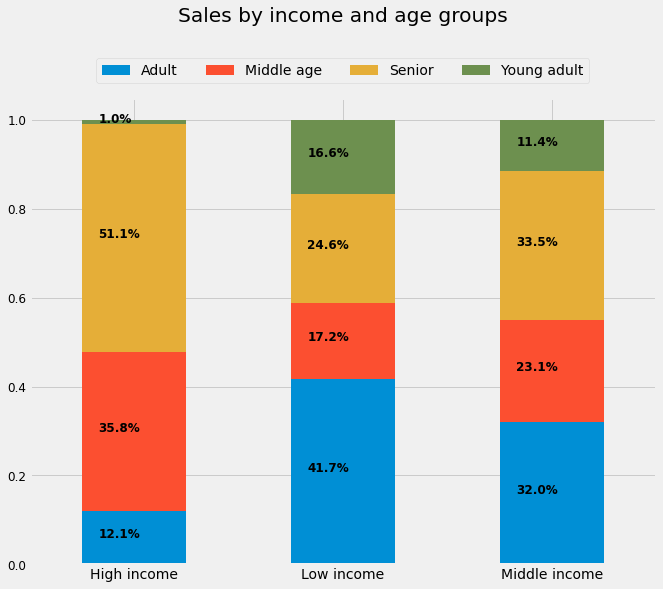

In [127]:
# Plotting the bar chart of distribution of sales in income and age groups

bar_income_age_sales = ct_income_age_sales.plot(
                        kind = 'bar',
                        stacked = True,
                        figsize = (10, 8),
                        xlabel = '',
                        )

plt.xticks(rotation = 0)
plt.legend(loc = 'upper center', ncol = 4, bbox_to_anchor = (0.5, 1.1))
plt.title(label = 'Sales by income and age groups', x = 0.5, y = 1.15)

for n, x in enumerate([*ct_ias_labels.index.values]):
    for (proportion, y_loc) in zip(ct_income_age_sales.loc[x],
                                   ct_income_age_sales.loc[x].cumsum()):
                
        plt.text(x = n - 0.17,
                 y = (y_loc - proportion) + (proportion / 2),
                 s = f'{np.round(proportion * 100, 1)}%', 
                 color = 'black',
                 fontsize = 12,
                 fontweight = 'bold')

bar_income_age_sales

In [128]:
# Summary statistics for income groups, by price

incomeg_sums_price = df_opc.groupby('income_group').agg({'prices': ['min', 'mean', 'max']})

incomeg_sums_price

prices                
                 min      mean   max
income_group                        
High income      1.0  7.936962  25.0
Low income       1.0  6.766403  25.0
Middle income    1.0  7.928429  25.0

In [129]:
# Summary statistics for income groups, by ordering frequency

incomeg_sums_freq = df_opc.groupby('income_group').agg({'median_days_between_orders': ['min', 'mean', 'max']})

incomeg_sums_freq

median_days_between_orders                 
                                     min       mean   max
income_group                                             
High income                          0.0   9.763752  30.0
Low income                           0.0  10.477848  30.0
Middle income                        0.0   9.900317  30.0

### 3.4.2 Profile: Gluten tolerance

In [130]:
# Customers by gluten tolerance

df_gluten_cust = df_opc.groupby('gluten_flag')['user_id'].nunique()

df_gluten_cust

gluten_flag
Gluten intolerant     43947
Gluten tolerant      118684
Name: user_id, dtype: int64

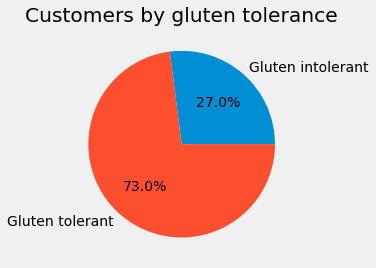

In [131]:
# Plotting a pie chart of customers by gluten tolerance

pie_gluten_cust = df_gluten_cust.plot(
                            autopct='%1.1f%%',
                            kind = 'pie',
                            title = 'Customers by gluten tolerance',
                            ylabel = ''
                            )

In [132]:
# Cross-referencing gluten_flag and age groups

df_unique = df_opc.drop_duplicates(subset = 'user_id')

ct_gluten_cust_ageg = pd.crosstab(df_unique['gluten_flag'],
                                  df_unique['age_group'].sort_values(ascending = False),
                                  normalize = 'index')

ct_gluten_cust_ageg

age_group,Adult,Middle age,Senior,Young adult
gluten_flag,,,,
Gluten intolerant,0.312262,0.235647,0.345371,0.106719
Gluten tolerant,0.310901,0.236881,0.342043,0.110175


In [133]:
# Cross-tab for labels

ct_gca_labels = pd.crosstab(
                    df_unique['gluten_flag'],
                    df_unique['age_group'].sort_values(ascending = False),
                    )

ct_gca_labels

age_group,Adult,Middle age,Senior,Young adult
gluten_flag,,,,
Gluten intolerant,13723,10356,15178,4690
Gluten tolerant,36899,28114,40595,13076


<AxesSubplot:title={'center':'Gluten tolerance by age groups'}>

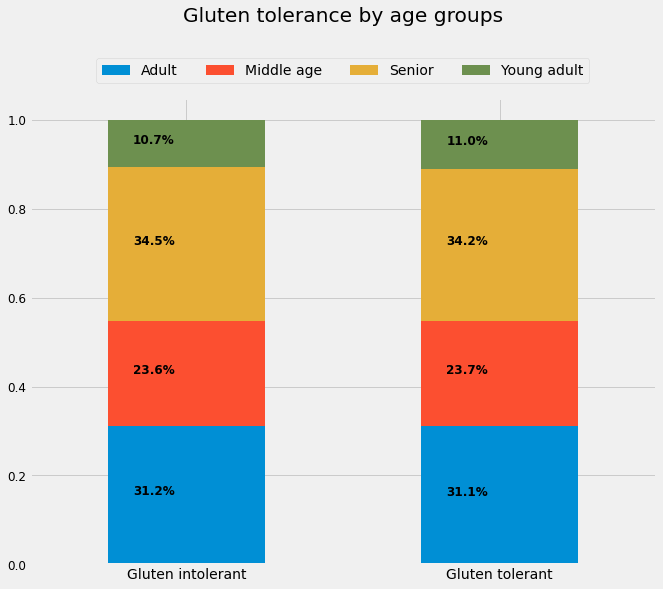

In [134]:
# Plotting a bar chart of gluten tolarance by age groups

bar_gluten_cust_ageg = ct_gluten_cust_ageg.plot(
                        kind = 'bar',
                        stacked = True,
                        figsize = (10, 8),
                        xlabel = '',
                        )

plt.xticks(rotation = 0)
plt.legend(loc = 'upper center', ncol = 4, bbox_to_anchor = (0.5, 1.1))
plt.title(label = 'Gluten tolerance by age groups', x = 0.5, y = 1.15)

for n, x in enumerate([*ct_gca_labels.index.values]):
    for (proportion, y_loc) in zip(ct_gluten_cust_ageg.loc[x],
                                   ct_gluten_cust_ageg.loc[x].cumsum()):
                
        plt.text(x = n - 0.17,
                 y = (y_loc - proportion) + (proportion / 2),
                 s = f'{np.round(proportion * 100, 1)}%', 
                 color = 'black',
                 fontsize = 12,
                 fontweight = 'bold')

bar_gluten_cust_ageg

In [135]:
# Summary statistics for gluten tolerance, by price

gluten_price_stat = df_opc.groupby('gluten_flag').agg({'prices': ['min', 'mean', 'max']})

gluten_price_stat

prices                
                     min      mean   max
gluten_flag                             
Gluten intolerant    1.0  7.629775  25.0
Gluten tolerant      1.0  7.814258  25.0

In [136]:
# Summary statistics for gluten tolerance, by ordering frequency

gluten_order_freq_stat = df_opc.groupby('gluten_flag').agg({'median_days_between_orders': ['min', 'mean', 'max']})

gluten_order_freq_stat

median_days_between_orders                 
                                         min       mean   max
gluten_flag                                                  
Gluten intolerant                        0.0  12.040586  30.0
Gluten tolerant                          0.0   9.650534  30.0

# 4.0 Exporting data

## 4.1. Exporting visualizations

In [137]:
# Defining the path for visualizations

path1 = (r'E:\OneDrive\ANITA\DATA ANALYST\IMMERSION\Achievement 4\22-08 Instacart Basket Analysis\4.0 Analysis')

In [138]:
bar_days_orders.figure.savefig(os.path.join(path1, '4.2 Visualizations, final', '311_bar_days_orders_png'), bbox_inches = 'tight')

In [139]:
bar_hours_orders.figure.savefig(os.path.join(path1, '4.2 Visualizations, final', '312_bar_hours_orders_png'), bbox_inches = 'tight')

In [140]:
line_hours_sum_prices.figure.savefig(os.path.join(path1, '4.2 Visualizations, final', '313_line_hours_sum_prices_png'), bbox_inches = 'tight')

In [141]:
pie_price_range.figure.savefig(os.path.join(path1, '4.2 Visualizations, final', '321_pie_price_range_png'), bbox_inches = 'tight')

In [142]:
bar_prod_dep.figure.savefig(os.path.join(path1, '4.2 Visualizations, final', '322_bar_prod_dep_png'), bbox_inches = 'tight')

In [143]:
pie_cust_loyalty.figure.savefig(os.path.join(path1, '4.2 Visualizations, final', '331_pie_cust_loyalty_png'), bbox_inches = 'tight')

In [144]:
pie_cust_loyalty_orders.figure.savefig(os.path.join(path1, '4.2 Visualizations, final', '331_pie_cust_loyalty_orders_png'), bbox_inches = 'tight')

In [145]:
pie_cust_reg_loy.figure.savefig(os.path.join(path1, '4.2 Visualizations, final', '331_pie_cust_reg_loyalty_png'), bbox_inches = 'tight')

In [146]:
pie_cust_pricer_loy.figure.savefig(os.path.join(path1, '4.2 Visualizations, final', '331_pie_cust_pricer_loy_png'), bbox_inches = 'tight')

In [147]:
scatt_prod_dep.figure.savefig(os.path.join(path1, '4.2 Visualizations, final', '332_scatt_prod_dep_png'), bbox_inches = 'tight')

In [148]:
pie_customers_region.figure.savefig(os.path.join(path1, '4.2 Visualizations, final', '333_pie_customers_region_png'), bbox_inches = 'tight')

In [149]:
pie_region_order.figure.savefig(os.path.join(path1, '4.2 Visualizations, final', '333_pie_region_order_png'), bbox_inches = 'tight')

In [150]:
pie_cust_freq.figure.savefig(os.path.join(path1, '4.2 Visualizations, final', '333_pie_cust_freq_png'), bbox_inches = 'tight')

In [151]:
pie_freq_region.figure.savefig(os.path.join(path1, '4.2 Visualizations, final', '333_pie_freq_region_png'), bbox_inches = 'tight')

In [152]:
pie_cust_spender.figure.savefig(os.path.join(path1, '4.2 Visualizations, final', '333_pie_cust_spender_png'), bbox_inches = 'tight')

In [153]:
pie_spender_region.figure.savefig(os.path.join(path1, '4.2 Visualizations, final', '333_pie_spender_region_png'), bbox_inches = 'tight')

In [154]:
hist_age.figure.savefig(os.path.join(path1, '4.2 Visualizations, final', '334_hist_age_png'), bbox_inches = 'tight')

In [155]:
pie_customers_ageg.figure.savefig(os.path.join(path1, '4.2 Visualizations, final', '334_pie_customers_ageg_png'), bbox_inches = 'tight')

In [156]:
pie_ageg_order.figure.savefig(os.path.join(path1, '4.2 Visualizations, final', '334_pie_ageg_order_png'), bbox_inches = 'tight')

In [157]:
pie_freq_ageg.figure.savefig(os.path.join(path1, '4.2 Visualizations, final', '334_pie_freq_ageg_png'), bbox_inches = 'tight')

In [158]:
pie_spender_ageg.figure.savefig(os.path.join(path1, '4.2 Visualizations, final', '334_pie_spender_ageg_png'), bbox_inches = 'tight')

In [159]:
scatt_age_inc.figure.savefig(os.path.join(path1, '4.2 Visualizations, final', '334_scatt_age_inc_png'), bbox_inches = 'tight')

In [160]:
pie_cust_marital.figure.savefig(os.path.join(path1, '4.2 Visualizations, final', '335_pie_cust_marital_png'), bbox_inches = 'tight')

In [161]:
pie_marital_order.figure.savefig(os.path.join(path1, '4.2 Visualizations, final', '335_pie_marital_order_png'), bbox_inches = 'tight')

In [162]:
pie_freq_marital.figure.savefig(os.path.join(path1, '4.2 Visualizations, final', '335_pie_freq_marital_png'), bbox_inches = 'tight')

In [163]:
pie_spender_marital.figure.savefig(os.path.join(path1, '4.2 Visualizations, final', '335_pie_spender_marital_png'), bbox_inches = 'tight')

In [164]:
pie_cust_income.figure.savefig(os.path.join(path1, '4.2 Visualizations, final', '336_pie_cust_income_png'), bbox_inches = 'tight')

In [165]:
pie_income_orders.figure.savefig(os.path.join(path1, '4.2 Visualizations, final', '336_pie_income_orders_png'), bbox_inches = 'tight')

In [166]:
pie_freq_income.figure.savefig(os.path.join(path1, '4.2 Visualizations, final', '336_pie_freq_income_png'), bbox_inches = 'tight')

In [167]:
pie_spender_income.figure.savefig(os.path.join(path1, '4.2 Visualizations, final', '336_pie_spender_income_png'), bbox_inches = 'tight')

In [168]:
bar_income_age_cust.figure.savefig(os.path.join(path1, '4.2 Visualizations, final', '341_bar_income_age_cust_png'), bbox_inches = 'tight')

In [169]:
bar_income_age_sales.figure.savefig(os.path.join(path1, '4.2 Visualizations, final', '341_bar_income_age_sales_png'), bbox_inches = 'tight')

In [170]:
pie_gluten_cust.figure.savefig(os.path.join(path1, '4.2 Visualizations, final', '342_pie_gluten_cust_png'), bbox_inches = 'tight')

In [171]:
bar_gluten_cust_ageg.figure.savefig(os.path.join(path1, '4.2 Visualizations, final', '342_bar_gluten_cust_ageg_png'), bbox_inches = 'tight')

## 4.2 Exporting final data set

In [172]:
# Exporting df_opc as ic_final_dataset.pkl

df_opc.to_pickle(os.path.join(path, '2.2 Prepared data', 'ic_final_dataset.pkl'))